In [1]:
from sepp_auxiliar_functions import *
from class_sepp_model import *

# Data

/Users/caesgue/opt/anaconda3/lib/python3.8/site-packages/pyproj/crs/crs.py:68: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
/Users/caesgue/opt/anaconda3/lib/python3.8/site-packages/pyproj/crs/crs.py:306: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  projstring = _prepare_from_string(" ".join((projstring, projkwargs)))
/Users/caesgue/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3357: DtypeWarning: Columns (9,11) have mixed types.Specify dtype option on import or set low_memory=

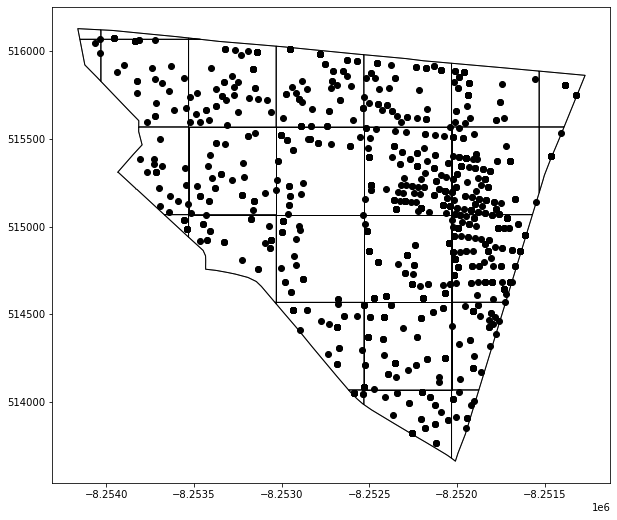

In [2]:
array_polyg_evts = cells_on_map(500, 500, 2, 44)

In [3]:
# vamos a tomar 13 semanas de entrenamiento y como test usamos datos de 1 semana, 
# haciendo k=5 (5 simulaciones), por lo que tomamos 18 semanas de datos.
train_data1 = training_data('2018-01-01 00:00:00', '2018-02-01 23:59:59', array_polyg_evts[0])
tst_data1 = test_data('2018-04-02 00:00:00', '2018-04-08 23:59:59', array_polyg_evts[0])
train_data2 =training_data('2018-01-01 00:00:00', '2018-04-08 23:59:59', array_polyg_evts[0])
tst_data2 = test_data('2018-04-09 00:00:00', '2018-04-15 23:59:59', array_polyg_evts[0])
train_data3 = training_data('2018-01-01 00:00:00', '2018-04-15 23:59:59', array_polyg_evts[0])
tst_data3 = test_data('2018-04-16 00:00:00', '2018-04-22 23:59:59', array_polyg_evts[0])
train_data4 =training_data('2018-01-01 00:00:00', '2018-04-22 23:59:59', array_polyg_evts[0])
tst_data4 = test_data('2018-04-23 00:00:00', '2018-04-29 23:59:59', array_polyg_evts[0])
train_data5 = training_data('2018-01-01 00:00:00', '2018-04-29 23:59:59', array_polyg_evts[0])
tst_data5 = test_data('2018-04-30 00:00:00', '2018-05-06 23:59:59', array_polyg_evts[0])

data_train = [train_data1, train_data2, train_data3, train_data4, train_data5]
data_test = [tst_data1, tst_data2, tst_data3, tst_data4, tst_data5]

In [4]:
array_events_polyg_train = cov_join_events(data_train[0], array_polyg_evts[1])
array_events_polyg_test = cov_join_events(data_test[0], array_polyg_evts[1])
temp_factor, sp_factor = 12, 6.5
number_hours = 168

/Users/caesgue/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [5]:
sepp_mod = ModeloRinhas(0, array_events_polyg_train[3], array_events_polyg_train[0], array_events_polyg_train[1], temp_factor, sp_factor, number_hours, array_polyg_evts[1])

# Training

In [6]:
train = sepp_mod.train_model()

# Prediction

In [7]:
prediction = sepp_mod.predict_model()

/Users/caesgue/opt/anaconda3/lib/python3.8/site-packages/pyproj/crs/crs.py:68: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [8]:
prediction[0]

,TimeStamp,X,Y,geometry
0,0.004950,-8.252950e+06,515257.072429,POINT (-8252950.210 515257.072)
1,0.007587,-8.252538e+06,514032.421871,POINT (-8252538.112 514032.422)
2,0.008714,-8.253797e+06,516089.794347,POINT (-8253797.100 516089.794)
3,0.016162,-8.254041e+06,516112.185561,POINT (-8254041.376 516112.186)
4,0.019284,-8.251892e+06,514999.757593,POINT (-8251891.929 514999.758)
...,...,...,...,...
3119,13.978777,-8.252391e+06,515869.551384,POINT (-8252391.331 515869.551)
3120,13.982471,-8.252641e+06,514718.824016,POINT (-8252640.714 514718.824)
3121,13.988734,-8.254052e+06,515922.285070,POINT (-8254051.995 515922.285)
3122,13.991727,-8.252826e+06,514364.832015,POINT (-8252826.171 514364.832)


# Validation

In [9]:
array_cells_events_tst_data_cells = arr_cells_events_data(array_events_polyg_test[3], prediction[1])
fil = filtering_data(20, array_cells_events_tst_data_cells, prediction[0], array_polyg_evts[1], array_events_polyg_test[3])

/Users/caesgue/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [10]:
validation = sepp_mod.validation_model(fil[0], prediction[0])
validation

0.17381562099871958